Total Revenue: $14,669,162.23


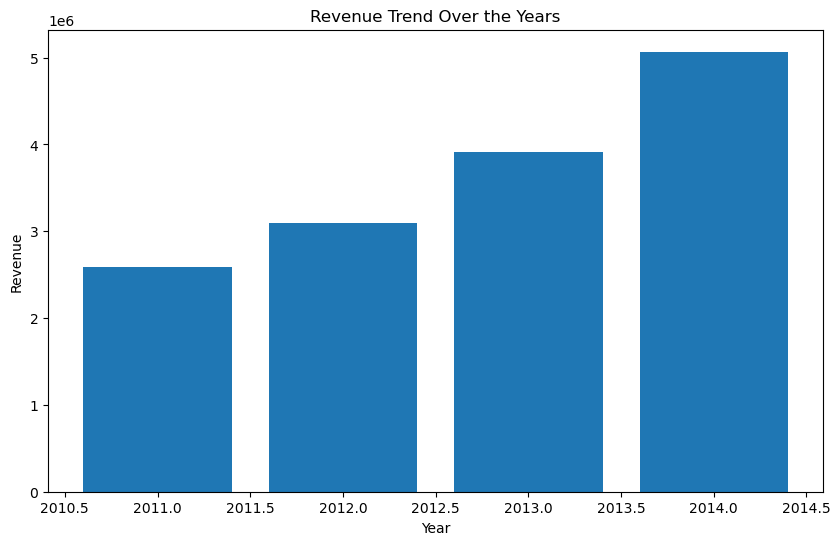


Top 10 Products by Revenue:
                                           product_name       sales
310                        Apple Smart Phone, Full Size  89230.7786
970                        Cisco Smart Phone, Full Size  86874.0906
2415                    Motorola Smart Phone, Full Size  77783.6710
2501                       Nokia Smart Phone, Full Size  74770.0505
866               Canon imageCLASS 2200 Advanced Copier  61599.8240
1837         Hon Executive Leather Armchair, Adjustable  60951.2641
2631  Office Star Executive Leather Armchair, Adjust...  54797.8038
2988                      Samsung Smart Phone, Cordless  53126.4600
1714  Harbour Creations Executive Leather Armchair, ...  53089.9500
2502                  Nokia Smart Phone, with Caller ID  51136.2267

Revenue by Customer Segment:
       segment         sales
0     Consumer  7.535086e+06
1    Corporate  4.449519e+06
2  Home Office  2.684557e+06

Top 10 Shipping Destinations by Revenue:
               city             sta

In [1]:
import pandas as pd

# Loading data files
customers = pd.read_csv('customer.csv')
products = pd.read_csv('product.csv')
shipping_destinations = pd.read_csv('shipping_destination.csv')
trans_2011 = pd.read_csv('trans_fact_2011.csv')
trans_2012 = pd.read_csv('trans_fact_2012.csv')
trans_2013 = pd.read_csv('trans_fact_2013.csv')
trans_2014 = pd.read_csv('trans_fact_2014.csv')

# Combining transaction data from different years
transactions = pd.concat([trans_2011, trans_2012, trans_2013, trans_2014], ignore_index=True)

# Merging the transaction data with other data sources
merged_data = transactions.merge(customers, on='customer_id', how='left') \
                            .merge(products, on='product_id', how='left') \
                            .merge(shipping_destinations, left_on='order_id', right_on='order-id', how='left')

# Calculating total revenue
total_revenue = merged_data['sales'].sum()
print(f'Total Revenue: ${total_revenue:,.2f}')

# Plotting revenue trend over time
merged_data['order_date'] = pd.to_datetime(merged_data['order_date'], format='%d-%m-%Y')
merged_data['year'] = merged_data['order_date'].dt.year
revenue_by_year = merged_data.groupby('year')['sales'].sum().reset_index()
revenue_by_year.sort_values('year', inplace=True)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(revenue_by_year['year'], revenue_by_year['sales'])
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Revenue Trend Over the Years')
plt.show()

# Identifying top-selling products
top_products = merged_data.groupby('product_name')['sales'].sum().reset_index() \
                           .sort_values('sales', ascending=False).head(10)
print('\nTop 10 Products by Revenue:')
print(top_products[['product_name', 'sales']])

# Analyzing customer segmentation
customer_segments = merged_data.groupby('segment')['sales'].sum().reset_index()
print('\nRevenue by Customer Segment:')
print(customer_segments)

# Analyzing shipping destinations
shipping_revenue = merged_data.groupby(['city', 'state', 'country'])['sales'].sum().reset_index() \
                               .sort_values('sales', ascending=False)
print('\nTop 10 Shipping Destinations by Revenue:')
print(shipping_revenue.head(10))

Total Profit: $1,703,490.56


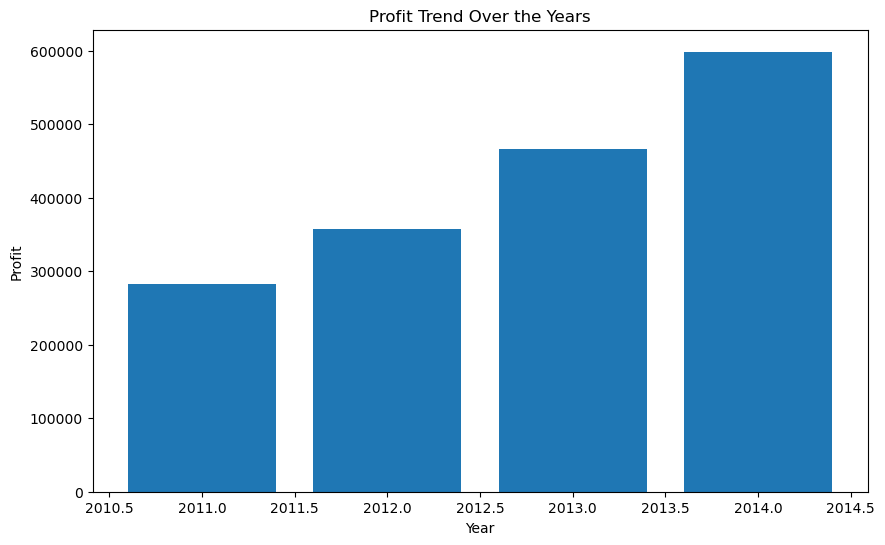


Top 10 Products by Profit:
                                           product_name      profit
866               Canon imageCLASS 2200 Advanced Copier  25199.9280
970                        Cisco Smart Phone, Full Size  19742.2006
2415                    Motorola Smart Phone, Full Size  18466.5610
1926                                  Hoover Stove, Red  16028.6750
1714  Harbour Creations Executive Leather Armchair, ...  11713.4500
3098               Sauder Classic Bookcase, Traditional  10672.0730
589                                  Belkin Router, USB  10601.8566
2502                  Nokia Smart Phone, with Caller ID  10270.1867
971                   Cisco Smart Phone, with Caller ID   9535.5408
2501                       Nokia Smart Phone, Full Size   9242.1805

Profit by Customer Segment:
       segment        profit
0     Consumer  865053.35526
1    Corporate  509688.52886
2  Home Office  328748.67222

Top 10 Shipping Destinations by Profit:
               city            state  

In [2]:
import pandas as pd

# Loading data files
customers = pd.read_csv('customer.csv')
products = pd.read_csv('product.csv')
shipping_destinations = pd.read_csv('shipping_destination.csv')
trans_2011 = pd.read_csv('trans_fact_2011.csv')
trans_2012 = pd.read_csv('trans_fact_2012.csv')
trans_2013 = pd.read_csv('trans_fact_2013.csv')
trans_2014 = pd.read_csv('trans_fact_2014.csv')

# Combining transaction data from different years
transactions = pd.concat([trans_2011, trans_2012, trans_2013, trans_2014], ignore_index=True)

# Merging transaction data with other data sources
merged_data = transactions.merge(customers, on='customer_id', how='left') \
                            .merge(products, on='product_id', how='left') \
                            .merge(shipping_destinations, left_on='order_id', right_on='order-id', how='left')

# Calculating total profit
total_profit = merged_data['profit'].sum()
print(f'Total Profit: ${total_profit:,.2f}')

# Plotting profit trend over time
merged_data['order_date'] = pd.to_datetime(merged_data['order_date'], format='%d-%m-%Y')
merged_data['year'] = merged_data['order_date'].dt.year
profit_by_year = merged_data.groupby('year')['profit'].sum().reset_index()
profit_by_year.sort_values('year', inplace=True)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(profit_by_year['year'], profit_by_year['profit'])
plt.xlabel('Year')
plt.ylabel('Profit')
plt.title('Profit Trend Over the Years')
plt.show()

# Identifying top-selling products by profit
top_products = merged_data.groupby('product_name')['profit'].sum().reset_index() \
                           .sort_values('profit', ascending=False).head(10)
print('\nTop 10 Products by Profit:')
print(top_products[['product_name', 'profit']])

# Analyzing customer segmentation by profit
customer_segments = merged_data.groupby('segment')['profit'].sum().reset_index()
print('\nProfit by Customer Segment:')
print(customer_segments)

# Analyzing shipping destinations by profit
shipping_profit = merged_data.groupby(['city', 'state', 'country'])['profit'].sum().reset_index() \
                               .sort_values('profit', ascending=False)
print('\nTop 10 Shipping Destinations by Profit:')
print(shipping_profit.head(10))

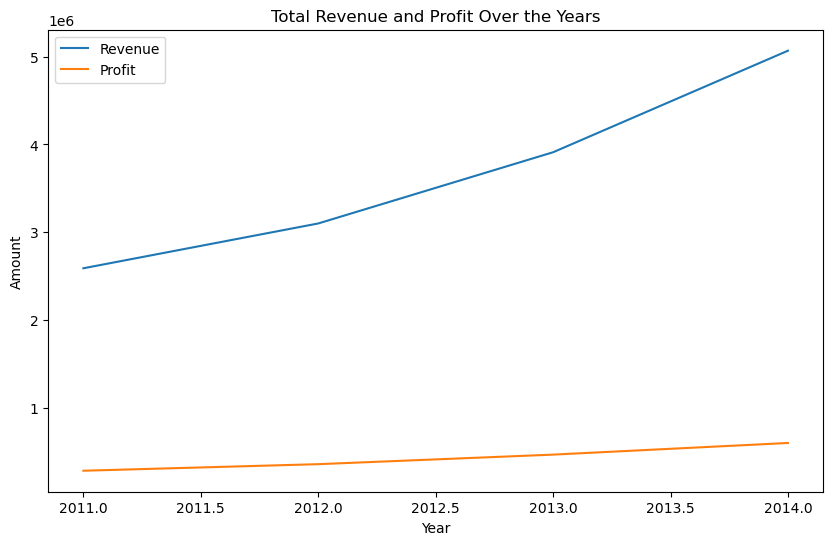

In [3]:
import matplotlib.pyplot as plt

# Preparing data for line charts
revenue_by_year = merged_data.groupby('year')['sales'].sum().reset_index()
profit_by_year = merged_data.groupby('year')['profit'].sum().reset_index()

# Plotting line charts
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(revenue_by_year['year'], revenue_by_year['sales'], label='Revenue')
ax.plot(profit_by_year['year'], profit_by_year['profit'], label='Profit')
ax.set_xlabel('Year')
ax.set_ylabel('Amount')
ax.set_title('Total Revenue and Profit Over the Years')
ax.legend()
plt.show()

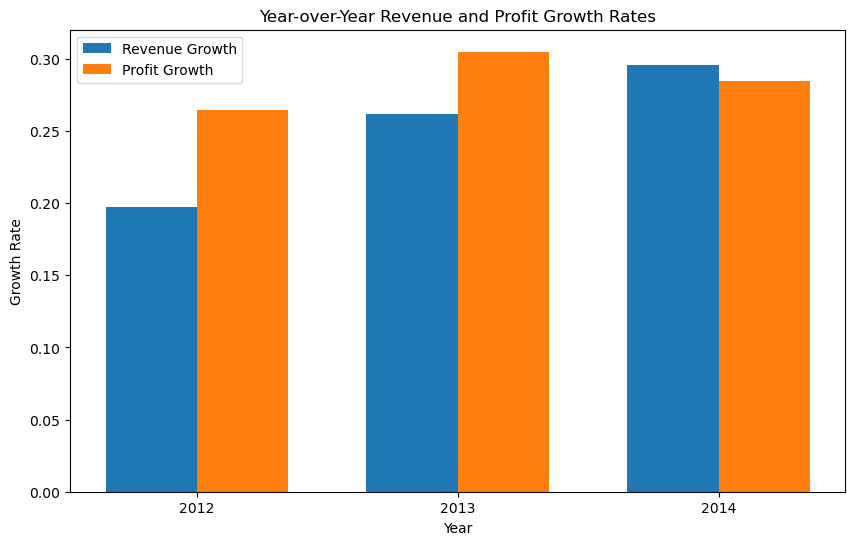

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Calculating year-over-year growth rates
revenue_by_year['revenue_growth'] = revenue_by_year['sales'].pct_change()
profit_by_year['profit_growth'] = profit_by_year['profit'].pct_change()

# Plotting bar chart with bars side by side
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(revenue_by_year['year'][1:]))
rects1 = ax.bar(index, revenue_by_year['revenue_growth'][1:], bar_width, label='Revenue Growth')
rects2 = ax.bar(index + bar_width, profit_by_year['profit_growth'][1:], bar_width, label='Profit Growth')

ax.set_xlabel('Year')
ax.set_ylabel('Growth Rate')
ax.set_title('Year-over-Year Revenue and Profit Growth Rates')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(revenue_by_year['year'][1:])
ax.legend()

plt.show()

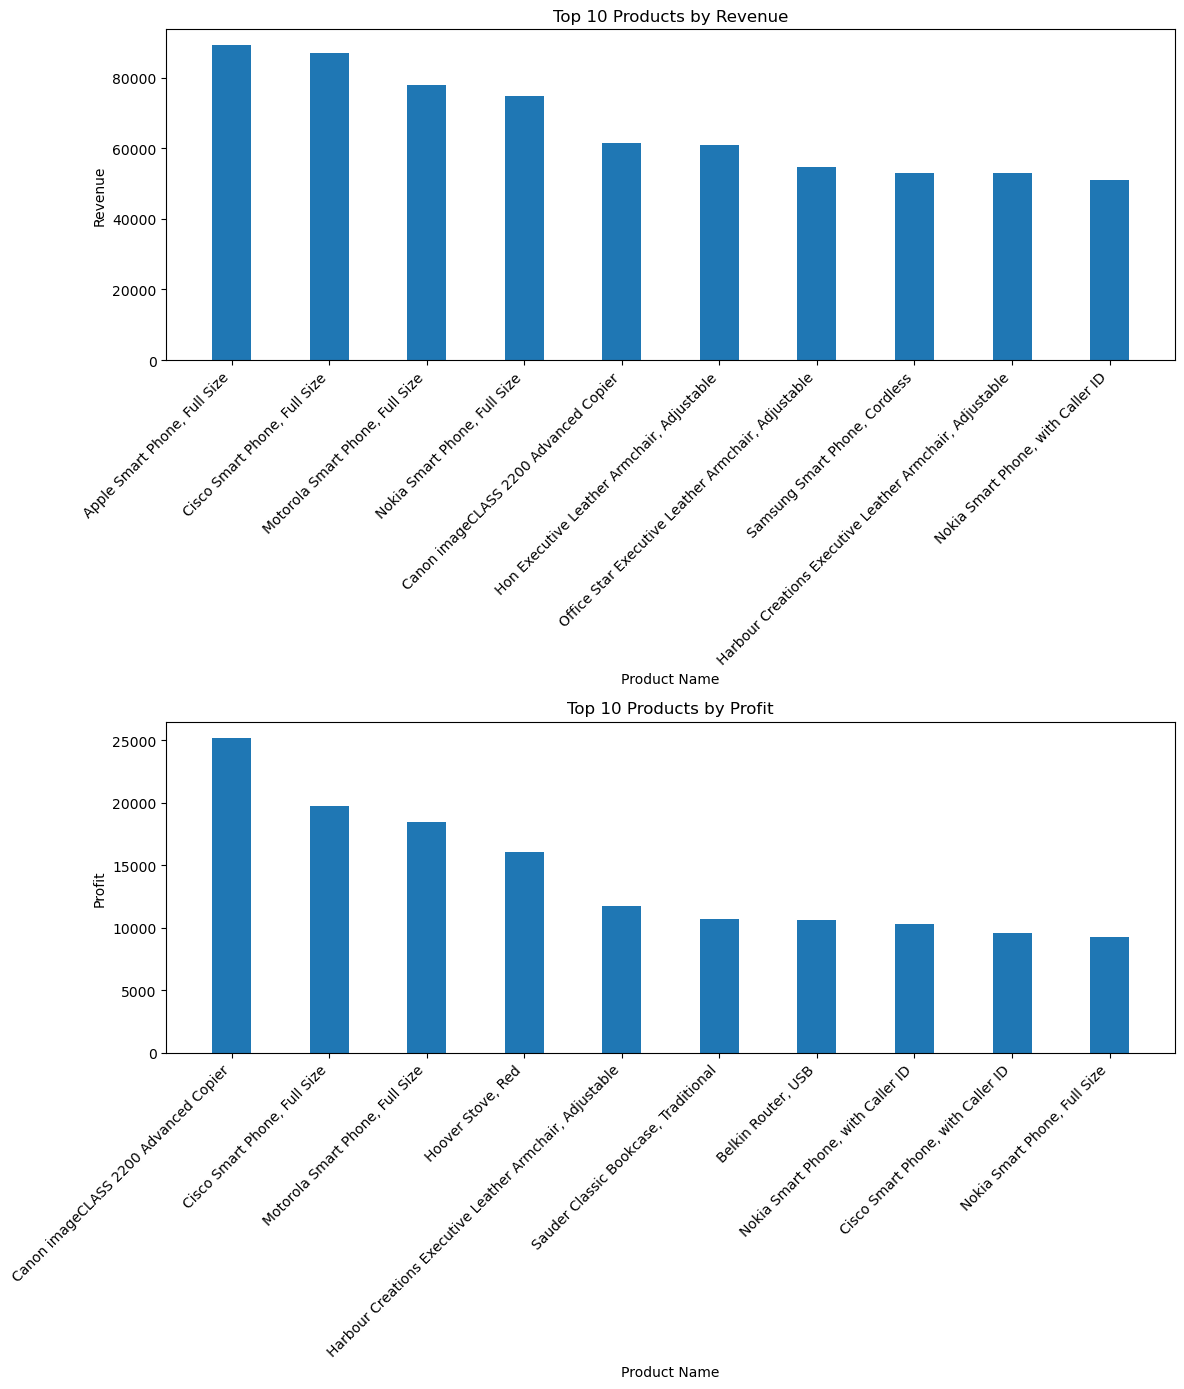

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Top 10 products by revenue
top_products_revenue = merged_data.groupby('product_name')['sales'].sum().reset_index().sort_values('sales', ascending=False).head(10)

# Top 10 products by profit
top_products_profit = merged_data.groupby('product_name')['profit'].sum().reset_index().sort_values('profit', ascending=False).head(10)

# Plotting bar charts with increased figure size, markings, and aligned x-axis markings
fig, ax = plt.subplots(2, 1, figsize=(12, 14))  # Adjusted figure size for better zoom and visibility

bar_width = 0.4  # Adjusting bar width for better alignment

index1 = np.arange(len(top_products_revenue['product_name']))
ax[0].bar(index1, top_products_revenue['sales'], bar_width, label='Revenue')
ax[0].set_title('Top 10 Products by Revenue')
ax[0].set_xlabel('Product Name')
ax[0].set_ylabel('Revenue')
ax[0].set_xticks(index1)
ax[0].set_xticklabels(top_products_revenue['product_name'], rotation=45, ha='right')

index2 = np.arange(len(top_products_profit['product_name']))
ax[1].bar(index2, top_products_profit['profit'], bar_width, label='Profit')
ax[1].set_title('Top 10 Products by Profit')
ax[1].set_xlabel('Product Name')
ax[1].set_ylabel('Profit')
ax[1].set_xticks(index2)
ax[1].set_xticklabels(top_products_profit['product_name'], rotation=45, ha='right')

plt.tight_layout()
plt.show()